In [1]:
#
# Created July 17, 2018
# Copyright S.W. Kim
#
import numpy as np
import matplotlib.pyplot

class Perceptron:
    def __init__(self, input_dim, hidden_dim, hidden_dim2, output_dim, lr=0.01):
        self.w1 =  np.random.normal(0.0, pow(input_dim, -0.5), (input_dim, hidden_dim))
        self.w2 =  np.random.normal(0.0, pow(hidden_dim, -0.5), (hidden_dim, hidden_dim2))
        self.w3 = np.random.normal(0.0, pow(hidden_dim2, -0.5),(hidden_dim2, output_dim))
        self.h = np.zeros((1,hidden_dim))
        self.lr = lr
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim        
        self.theta = 0

    def softmax(self, x):
        e_x = np.exp(x - np.max(x))
        return e_x / e_x.sum(axis=0) # only difference
        
    def sigmoid(self, x):
        return 1/(1+np.exp(-x))

    def feedforward(self, x):
        a = x.astype(float)
        b = self.w1.astype(float)
        self.h = self.sigmoid(np.dot(a, b)- self.theta)
        return self.sigmoid(np.dot(self.h, self.w2)- self.theta)

    def feedforward_upto_hidden(self, x):
        return self.sigmoid(np.dot(x, self.w1)- self.theta)

    def bprop_w2(self, g, y): # target, output
        q = (-2)*(g-y)*y*(1-y)
        return np.dot(self.h.reshape(self.hidden_dim,1), q.reshape(1,self.output_dim))

    def bprop_w1(self, g, y, x): # target, output, input
        q1 = (-2)*(g-y)*y*(1-y)
        q2 = np.dot(self.w2, q1)
        return np.dot(x.reshape(self.input_dim, 1), q2*self.h*(1-self.h).reshape(1,self.hidden_dim))
    
    def training(self, input, target):
        x = np.array(input).T
        y = self.feedforward(x)
        g = np.array(target).T
            
        self.w1 = self.w1 - self.lr*self.bprop_w1(g, y, x)
        self.w2 = self.w2 - self.lr*self.bprop_w2(g, y)

In [2]:
# Training
input_dim = 784
hidden_dim = 100
output_dim = 10
epoch = 10

pct = Perceptron(784,100,10, 0.1)

training_dataset_file = open("mnist_train_200.csv", 'r')
#training_dataset_file = open("mnist_train.csv", 'r')

training_dataset_list = training_dataset_file.readlines()
training_dataset_file.close()
#input_list = list()

for k in range(epoch):
    pct.lr = pct.lr * 0.8  # learning lrate decay
    for i in training_dataset_list:
        all_values = i.split(',')
        inputs = (np.asfarray(all_values[1:])/255.0*0.99)+0.01
#        input_list.append(inputs)
        
        targets = np.zeros(output_dim) + 0.01
        targets[int(all_values[0])] = 0.99
        
        pct.training(inputs, targets)

In [3]:
# Test
test_dataset_file = open("mnist_test_200.csv", 'r')
#test_dataset_file = open("mnist_test.csv", 'r')

test_dataset_list = test_dataset_file.readlines()
test_dataset_file.close()
#output_list = list()

In [4]:
all_values = test_dataset_list[0].split(',')
print(all_values[0])
pct.feedforward(np.asfarray(all_values[1:]))

7


array([0.18698669, 0.0013597 , 0.02438059, 0.14111365, 0.03863774,
       0.03249874, 0.0064671 , 0.95713105, 0.0520623 , 0.70100706])

Prediction fails. (target, predcition) =  4 9
Prediction =  [0.0159859  0.03262322 0.0513057  0.14995604 0.30251821 0.07803611
 0.04000777 0.20802012 0.09951881 0.38769794]
Prediction fails. (target, predcition) =  5 4
Prediction =  [0.08240082 0.10807992 0.25270549 0.02372933 0.31273611 0.10294817
 0.14171514 0.03237546 0.11314829 0.03660908]
Prediction fails. (target, predcition) =  6 2
Prediction =  [0.1422165  0.06322488 0.32177386 0.06060952 0.14246831 0.11368824
 0.04708043 0.06743191 0.10492214 0.05525434]
Prediction fails. (target, predcition) =  5 3
Prediction =  [0.15392212 0.04121639 0.08863522 0.21947229 0.05296066 0.07734507
 0.04054912 0.11078648 0.11630536 0.07759507]
Prediction fails. (target, predcition) =  9 4
Prediction =  [0.03884664 0.01581163 0.11444844 0.07742491 0.29805613 0.06653223
 0.06055963 0.18332211 0.09791436 0.28347645]
Prediction fails. (target, predcition) =  3 2
Prediction =  [0.0546628  0.035066   0.24055583 0.20584184 0.06519641 0.07196915
 0.19552

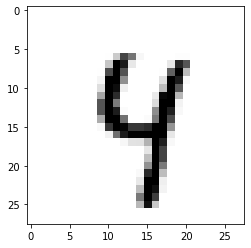

In [5]:
# Test error rate
success = 0
failure = 0

for i in test_dataset_list:
    all_values = i.split(',')
    target = int(all_values[0])
    
    all_values_normalized = (np.asfarray(all_values[1:])/255.0*0.99)+0.01
    prediction_list = pct.feedforward(np.asfarray(all_values_normalized))
    prediction = np.argmax(prediction_list)
    
    if target == prediction:
        success = success + 1
    else:
        failure = failure + 1
        
        print("Prediction fails. (target, predcition) = ", target, prediction)
        print("Prediction = ", prediction_list)

        im_array = np.asfarray(all_values_normalized).reshape((28,28))
        matplotlib.pyplot.imshow(im_array, cmap='Greys', interpolation='None')
        
print("Reconition error rate = ", (failure/(success+failure)))